In [1]:
import elasticsearch
from datetime import datetime


In [2]:
from tqdm import tqdm # Barra de progreso
from collections import Counter

#Pandas
import pandas as pd
from pandasql import sqldf


#Pandas, Numpy, Matplotlib, Seaborn
import geopandas as gpd
import shapely as shp
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

In [14]:
IP = "search.sophia2.org"
PORT = 9200
USER= "elastic_reader"
PASS= "1QpbX5Yd"

In [15]:


CITIES = [ "Valdivia", "Mariquina", "Lanco", "Máfil", "Corral","Paillaco", "Panguipulli", 
          "La Unión", "Río Bueno", "Futrono", "Los Lagos", "Lago Ranco"]

MEDIA_OUTLETS = ["rioenlinea","diariopaillaco","diariomafil",
               "diariolaguino","diariolaunion","diariofutrono",
              "diariolagoranco","elnavegante","lapailapaillaco",
              "centralnoticiaspanguipulli","diariodevaldivia",
              "lavozdepaillaco","diariolanco","suractual",
              "noticiaslosrios","diarioriobueno","diariosanjose","diariolaguino",
              "diariocorral"]
COUNTRY="chile"
KEYWORD="accidente"
SIMPLE_KEYWORD=True #esta variable es 'True' si KEYWORD es vacio o contiene una palabra simple, y 'False' si contiene una expresion o un concepto compuesto

In [16]:
def sophia_search(from_date,to_date,df_list):

    es = elasticsearch.Elasticsearch(
        IP,
        #port=PORT,
        http_auth=(USER, PASS)
    )

    match=""
    if (SIMPLE_KEYWORD):
        match="match"
    else:
        match="match_phrase"

    if len(KEYWORD)==0:
        query = { 
        "bool": { 
        "filter": [
            {"range": {
          "date": {
            "gte": from_date,
            "lt": to_date
          }}},
            { "term":  { "country": COUNTRY }},
            { "terms":  { "media_outlet": MEDIA_OUTLETS }} 
        ]
        }  
    }
    
    else:
        query = { 
        "bool": { 
        "must": [
            {match: { "text":KEYWORD}}
        ],
        "filter": [
            {"range": {
          "date": {
            "gte": from_date,
            "lt": to_date
          }}},
            { "term":  { "country": COUNTRY }},
            { "terms":  { "media_outlet": MEDIA_OUTLETS }} 
        ]
        }  
    }
        
    res = es.search(index="news", query=query, size=10000)
    print("Fechas: " + from_date + "|" + to_date)
    print("Son %d noticias encontradas..." % res['hits']['total']['value'])
    
    import pandas as pd
    data = {'id_news':[],'country':[],'media_outlet':[],'url':[],'title':[],'text':[],'date':[],'search':[]}

    df = pd.DataFrame(data)  

    for hit in res['hits']['hits']:
        id_news = hit['_source']['id_news']
        country = hit['_source']['country']
        media_outlet = hit['_source']['media_outlet']
        url = hit['_source']['url']
        title = hit['_source']['title']
        text = hit['_source']['text']
        date = hit['_source']['date']
        search = KEYWORD

        new_row = {'id_news':id_news, 'country':country, 'media_outlet':media_outlet, 'url':url, 'title':title, 'text':text, 'date':date, 'search':search}
        #print(new_row)
        
        df = df.append(new_row, ignore_index=True)
    df_list.append(df)

In [17]:
#Guardar noticias por fecha meses de 2018 a 2022
df_list = []
months = [
["2018-01-01", "2018-01-31"],
["2018-02-01", "2018-02-28"],
["2018-03-01", "2018-03-31"],
["2018-04-01", "2018-04-30"],
["2018-05-01", "2018-05-31"],
["2018-06-01", "2018-06-30"],
["2018-07-01", "2018-07-31"],
["2018-08-01", "2018-08-31"],
["2018-09-01", "2018-09-30"],
["2018-10-01", "2018-10-31"],
["2018-11-01", "2018-11-30"],
["2018-12-01", "2018-12-31"],
["2019-01-01", "2019-01-31"],
["2019-02-01", "2019-02-28"],
["2019-03-01", "2019-03-31"],
["2019-04-01", "2019-04-30"],
["2019-05-01", "2019-05-31"],
["2019-06-01", "2019-06-30"],
["2019-07-01", "2019-07-31"],
["2019-08-01", "2019-08-31"],
["2019-09-01", "2019-09-30"],
["2019-10-01", "2019-10-31"],
["2019-11-01", "2019-11-30"],
["2019-12-01", "2019-12-31"],
["2020-01-01", "2020-01-31"],
["2020-02-01", "2020-02-29"],
["2020-03-01", "2020-03-31"],
["2020-04-01", "2020-04-30"],
["2020-05-01", "2020-05-31"],
["2020-06-01", "2020-06-30"],
["2020-07-01", "2020-07-31"],
["2020-08-01", "2020-08-31"],
["2020-09-01", "2020-09-30"],
["2020-10-01", "2020-10-31"],
["2020-11-01", "2020-11-30"],
["2020-12-01", "2020-12-31"],
["2021-01-01", "2021-01-31"],
["2021-02-01", "2021-02-28"],
["2021-03-01", "2021-03-31"],
["2021-04-01", "2021-04-30"],
["2021-05-01", "2021-05-31"],
["2021-06-01", "2021-06-30"],
["2021-07-01", "2021-07-31"],
["2021-08-01", "2021-08-31"],
["2021-09-01", "2021-09-30"],
["2021-10-01", "2021-10-31"],
["2021-11-01", "2021-11-30"],
["2021-12-01", "2021-12-31"],
["2022-01-01", "2022-01-31"],
["2022-02-01", "2022-02-28"],
["2022-03-01", "2022-03-31"],
["2022-04-01", "2022-04-30"],
["2022-05-01", "2022-05-31"],
["2022-06-01", "2022-06-30"],
["2022-07-01", "2022-07-31"],
["2022-08-01", "2022-08-31"],
["2022-09-01", "2022-09-30"],
["2022-10-01", "2022-10-31"],
["2022-11-01", "2022-11-30"],
["2022-12-01", "2022-12-31"],
["2023-01-01", "2023-01-31"],
["2023-02-01", "2023-02-28"],
["2023-03-01", "2023-03-31"],
["2023-04-01", "2023-04-30"],
["2023-05-01", "2023-05-31"]
]

for month in months:
    sophia_search(month[0],month[1],df_list)

Fechas: 2018-01-01|2018-01-31
Son 11 noticias encontradas...
Fechas: 2018-02-01|2018-02-28
Son 11 noticias encontradas...
Fechas: 2018-03-01|2018-03-31
Son 6 noticias encontradas...
Fechas: 2018-04-01|2018-04-30
Son 11 noticias encontradas...
Fechas: 2018-05-01|2018-05-31
Son 13 noticias encontradas...
Fechas: 2018-06-01|2018-06-30
Son 9 noticias encontradas...
Fechas: 2018-07-01|2018-07-31
Son 7 noticias encontradas...
Fechas: 2018-08-01|2018-08-31
Son 8 noticias encontradas...
Fechas: 2018-09-01|2018-09-30
Son 12 noticias encontradas...
Fechas: 2018-10-01|2018-10-31
Son 7 noticias encontradas...
Fechas: 2018-11-01|2018-11-30
Son 5 noticias encontradas...
Fechas: 2018-12-01|2018-12-31
Son 6 noticias encontradas...
Fechas: 2019-01-01|2019-01-31
Son 21 noticias encontradas...
Fechas: 2019-02-01|2019-02-28
Son 16 noticias encontradas...
Fechas: 2019-03-01|2019-03-31
Son 19 noticias encontradas...
Fechas: 2019-04-01|2019-04-30
Son 25 noticias encontradas...
Fechas: 2019-05-01|2019-05-31
S

In [18]:
#agrupar los dataframes mensuales en uno solo
df_periodo = 0
df_periodo = pd.concat(df_list)
print(len(df_periodo))

2699


In [69]:
#Eliminar noticias duplicadas que tienen la misma URL
df_periodo = df_periodo.drop_duplicates(subset='url', keep='first')
print(len(df_periodo))

1869


In [19]:
#guardar en un CSV
df_periodo.to_csv("noticias_accidentes_losrios_20182023.csv")

In [20]:
df_periodo

,id_news,country,media_outlet,url,title,text,date,search
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente
...,...,...,...,...,...,...,...,...
24,49438118.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/04/dos-...,Dos voluntarios lesionados dejó volcamiento de...,Dos voluntarios lesionados dejó como consecuen...,2023-04-04,accidente
25,49447046.0,chile,rioenlinea,https://www.rioenlinea.cl/semana-santa-en-los-...,Semana Santa en Los Ríos culminó con más de ve...,Carabineros comunicó que en Semana Santa no hu...,2023-04-10,accidente
26,50286695.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/19/veci...,Vecinos de Chauquén y Municipalidad de Panguip...,Los vecinos de Chauquén han expresado su preoc...,2023-04-19,accidente
27,49431190.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Hustler será protagonista de las demostracione...,"El fundo Mosqueta, de agrícola Dos Kiwis, es e...",2023-04-14,accidente


In [21]:
import re

def extraer_palabras_con_www(nombre_archivo):
    palabras_con_www = []
    with open(nombre_archivo, 'r') as archivo:
        for linea in archivo:
            palabras = linea.split()
            for palabra in palabras:
                match = re.search(r'www\.(\w+)', palabra)
                if match:
                    palabras_con_www.append(match.group(1))
    return palabras_con_www

# Nombre del archivo que deseas leer
archivo_txt = 'mo.txt'

# Llamada a la función para extraer las palabras que comienzan con "www"
palabras_con_www = extraer_palabras_con_www(archivo_txt)

# Guardar los resultados en la lista "mo"
mo = palabras_con_www

# Imprimir la lista "mo"
print(mo)


['emol', 'latercera', 'publimetro', 'meganoticias', 'lun', 'lacuarta', 'elmostrador', 'theclinic', 'eldesconcierto', 'lahora', 'lasegunda', 'eldinamo', 'elciudadano', 'lanacion', 'cambio21', 'hoyxhoy', 'elsiglo', 'diariosurnoticias', 'elperiodista', 'larazon', 'cronicadigital', 'centralweb', 'tusnoticias', 'df', 'pulso', 'elcomunicador', 'diarioantofagasta', 'mercurioantofagasta', 'elnortero', 'estrellaantofagasta', 'antofagastanoticias', 'elamerica', 'mercuriocalama', 'enlalinea', 'estrellaloa', 'estrellatocopilla', 'estrellaarica', 'elmorrocotudo', 'aricaldia', 'aricahoy', 'elconcordia', 'aricamia', 'chasquis', 'atacamanoticias', 'tierramarillano', 'elquehaydecierto', 'diarioatacama', 'atacamaenlinea', 'chanarcillo', 'eldivisadero', 'diarioregionalaysen', 'elchelenko', 'elpatagondomingo', 'diarioaysenopina', 'vientopatagon', 'pagina7', 'diarioconcepcion', 'sabes', 'resumen', 'elsur', 'estrellaconce', 'elconcecuente', 'latribuna', 'elcontraste', 'angelino', 'diarioeldia', 'elobservato

In [ ]:
const palabrasClaveAccidente = [
  "accidente",
  "choque",
  "colisión",
  "colisionar",
  "conductor",
  "automóvil",
  "coche",
  "vehículo",
  "heridos",
  "lesionados",
  "fatal",
  "atropello",
  "volcadura",
  "accidente de tráfico",
  "accidente de carretera",
  "accidente de auto",
  "choque frontal",
  "accidente vial",
  "accidente fatal",
  "emergencia vial",
  "accidente grave",
  "accidente leve",
  "choque lateral",
  "accidente en autopista",
  "accidente en carretera",
  "accidente en la ciudad",
  "accidente en la vía pública",
  "accidente de tránsito",
  "accidente automovilístico",
  "accidente automotor",
  "colisión múltiple",
  "accidente de transporte",
  "accidente de vehículo",
  "accidente de tránsito",
  "circulación vial",
  "seguridad vial",
  "congestión de tráfico",
  "atascos",
  "accidente por exceso de velocidad",
  "accidente por distracción",
  "accidente por condiciones climáticas",
  "accidente por imprudencia",
  "accidente por estado de ebriedad",
];


In [22]:
FILE = "./noticias_accidentes_losrios_20182023.csv"

dataset = pd.read_csv(FILE)
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,id_news,country,media_outlet,url,title,text,date,search
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente


# 2. Definición de las comunas

In [23]:
CITIES = ["Valdivia", "Mariquina", "Lanco", "Máfil", "Corral",
          "Paillaco", "Panguipulli", "La Unión", "Río Bueno", "Futrono",
         "Los Lagos", "Lago Ranco"]

In [24]:
for city in CITIES:
    dataset.insert(8,city.replace(" ","_"),0)
    
dataset.head()

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,Futrono,Río_Bueno,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente,0,0,0,0,0,0,0,0,0,0,0,0
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente,0,0,0,0,0,0,0,0,0,0,0,0
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente,0,0,0,0,0,0,0,0,0,0,0,0
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente,0,0,0,0,0,0,0,0,0,0,0,0
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente,0,0,0,0,0,0,0,0,0,0,0,0


# 3. Buscar comunas en las noticias

In [37]:
import spacy
from spacy.lang.es.examples import sentences 

nlp = spacy.load("es_core_news_sm")

/home/valgreen/anaconda3/envs/mad_unidad2/lib/python3.9/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'es_core_news_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.5.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [38]:
matcher_cities = PhraseMatcher(nlp.vocab)

for city in CITIES:
    matcher_cities.add(city, [nlp(city)])

for index,row in dataset.iterrows():
    #print(index)
    txt = str(row["title"])+" "+str(row["text"])
    
    try:
        doc = nlp(txt)
        matches_cities = matcher_cities(doc)

        for match_id, start, end in matches_cities:
            span = doc[start:end]  # The matched span
            dataset.at[index,span.text.replace(" ","_")]=1
    
    except Exception as e:
        print(e)
        pass
    
dataset.to_csv("noticias_losrios_2022_porcomuna.csv")
dataset

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,Futrono,Río_Bueno,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente,0,0,0,0,0,0,1,0,0,0,0,1
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente,0,0,0,0,0,0,1,0,0,0,0,0
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente,0,0,0,0,0,0,0,0,0,0,0,1
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente,0,0,0,1,0,0,0,0,0,0,0,0
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,49438118.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/04/dos-...,Dos voluntarios lesionados dejó volcamiento de...,Dos voluntarios lesionados dejó como consecuen...,2023-04-04,accidente,0,0,0,0,0,0,0,0,0,0,0,1
2695,49447046.0,chile,rioenlinea,https://www.rioenlinea.cl/semana-santa-en-los-...,Semana Santa en Los Ríos culminó con más de ve...,Carabineros comunicó que en Semana Santa no hu...,2023-04-10,accidente,0,0,0,0,0,0,0,0,0,0,0,0
2696,50286695.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/19/veci...,Vecinos de Chauquén y Municipalidad de Panguip...,Los vecinos de Chauquén han expresado su preoc...,2023-04-19,accidente,0,0,0,0,0,1,0,0,0,0,0,0
2697,49431190.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Hustler será protagonista de las demostracione...,"El fundo Mosqueta, de agrícola Dos Kiwis, es e...",2023-04-14,accidente,0,1,0,1,0,0,0,0,0,0,0,0


In [39]:
from spacy.lang.es.examples import sentences 
from spacy.matcher import Matcher
from collections import Counter

FILE = "./noticias_losrios_2022_porcomuna.csv"

dataset = pd.read_csv(FILE)
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,Futrono,Río_Bueno,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente,0,0,0,0,0,0,1,0,0,0,0,1
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente,0,0,0,0,0,0,1,0,0,0,0,0
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente,0,0,0,0,0,0,0,0,0,0,0,1
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente,0,0,0,1,0,0,0,0,0,0,0,0
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente,0,0,1,0,0,0,0,0,0,0,0,0


# Procesar texto con el metodo nlp() de spacy

In [40]:
text=dataset["title"][4]
text


'Camión repartidor volcó camino a Futrono - Diario Laguino'

In [41]:
doc = nlp(text)

In [42]:
for token in doc:
    print(token.text, token.lemma_,token.is_stop,token.pos_)

Camión Camión False PROPN
repartidor repartidor False PROPN
volcó volcar False VERB
camino camino False NOUN
a a True ADP
Futrono Futrono False PROPN
- - False PUNCT
Diario Diario False PROPN
Laguino Laguino False PROPN


In [43]:
text=dataset["text"][6]
text

'Cuatro lesionados con diferentes grados de consideración fue el saldo del volcamiento de un camión de basura que se produjo esta mañana en la ruta T-39, camino que conecta Panguipulli con Los Lagos. La máquina (WC-1260) forma parte de la empresa Servi-Mar, vehículo que iba repleto de basura que sería trasladada a la ciudad de Valdivia. Cuando el camión pasaba por el\xa0sector Dollinco,\xa0el conductor perdió el control de la máquina y se volcó a un costado de la ruta, derramanado todo el contenido. Los afectados en este accidente fueron el conductor del vehículo Eric Contreras Núñez, Karen Curíb Urrutia, Ingrid Cuevas Curín y un menor de edad. Atendieron a este llamado de Comandancia los Bomberos de Panguipulli quienes ayudaron a los lesionados que de manera posterior fueron trasladados al centro de salud de mayor cercanía. Debido a los escombros que quedaron en el lugar fue necesario hacer desvíos en la ruta.     '

In [44]:
doc = nlp(text)
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

T-39 147 151 MISC
Panguipulli 172 183 PER
Los Lagos 188 197 LOC
La máquina 199 209 LOC
Servi-Mar 246 255 MISC
Valdivia 328 336 LOC
Dollinco 376 384 PER
Los afectados en este accidente 498 529 MISC
Eric Contreras Núñez 563 583 PER
Karen Curíb Urrutia 585 604 PER
Ingrid Cuevas Curín 606 625 PER
Atendieron a este llamado de 646 674 MISC
Comandancia los Bomberos de Panguipulli 675 714 LOC
Debido a los escombros 830 852 MISC


In [45]:
list_sentences=[]
for sentence in doc.sents:
    list_sentences.append(sentence)
    
list_sentences[0]

Cuatro lesionados con diferentes grados de consideración fue el saldo del volcamiento de un camión de basura que se produjo esta mañana en la ruta T-39, camino que conecta Panguipulli con Los Lagos.

# Extraer personas

In [46]:
for ent in doc.ents:
    if(ent.label_ == "PER"):
        if (" " in ent.text):
            print(ent.text, ent.start_char, ent.end_char, ent.label_)

Eric Contreras Núñez 563 583 PER
Karen Curíb Urrutia 585 604 PER
Ingrid Cuevas Curín 606 625 PER


# Extraer palabras clave

In [47]:
for token in doc:
    if(token.pos_=="NOUN"):
        print(token)

grados
consideración
saldo
volcamiento
camión
basura
mañana
ruta
camino
máquina
parte
empresa
vehículo
basura
ciudad
camión
sector
conductor
control
máquina
costado
ruta
contenido
afectados
accidente
conductor
vehículo
edad
manera
centro
salud
cercanía
escombros
lugar
desvíos
ruta


In [48]:
matcher = Matcher(nlp.vocab)


In [49]:
# pattern: NOUN-de-NOUN
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

# pattern: NOUN-ADJ
pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [50]:
matches = matcher(doc)

for match_id, start, end in matches:
    span = doc[start:end]
    print(span.text.lower())

grados de consideración
camión de basura
manera posterior
centro de salud


# Contar y ordenar por frecuencia

In [51]:
def count(list_elements):
    # Contar la frecuencia de cada elemento
    frecuencias = Counter(list_elements)

    # Ordenar las frecuencias de forma descendente
    frecuencias_ordenadas = frecuencias.most_common()

    # Imprimir las frecuencias ordenadas
    for string, frecuencia in frecuencias_ordenadas:
        print(f"{string}: {frecuencia}")

In [52]:
list_elements=[]

for token in doc:
    if(token.pos_=="NOUN"):
        list_elements.append(token.text.lower())
        
count(list_elements)

ruta: 3
camión: 2
basura: 2
máquina: 2
vehículo: 2
conductor: 2
grados: 1
consideración: 1
saldo: 1
volcamiento: 1
mañana: 1
camino: 1
parte: 1
empresa: 1
ciudad: 1
sector: 1
control: 1
costado: 1
contenido: 1
afectados: 1
accidente: 1
edad: 1
manera: 1
centro: 1
salud: 1
cercanía: 1
escombros: 1
lugar: 1
desvíos: 1


In [53]:
list_elements=[]

matches = matcher(doc)

for match_id, start, end in matches:
    span = doc[start:end]
    list_elements.append(span.text.lower())
    
count(list_elements)

grados de consideración: 1
camión de basura: 1
manera posterior: 1
centro de salud: 1


# Pruebas de calculo de la similitud entre dos documentos con noticias de prensa

In [54]:
text1=dataset["title"][6]
text1

'4 lesionados tras volcamiento de camión de basura en ruta Panguipulli-Los Lagos - Diario Laguino'

In [55]:
text2=dataset["title"][89]
text2

'Furgón escolar volcó  a un costado de la ruta quedando lesionado su conductor'

In [57]:
text3=dataset["title"][68]
text3

'A 24 años de la tragedia más grande en la Cuesta del Cero:  la sobreviviente María Alcatruz revive ese momento.'

In [58]:
# Procesamiento de las noticias
doc1 = nlp(text1)
doc2 = nlp(text2)
doc3 = nlp(text3)

In [59]:
# Cálculo de la similitud entre las noticias
similitud = doc1.similarity(doc2)

print(f"Similitud entre las noticias 1 y 2: {similitud}")

Similitud entre las noticias 1 y 2: 0.3698491069769699


/tmp/ipykernel_14406/1125385432.py:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similitud = doc1.similarity(doc2)


In [60]:
# Cálculo de la similitud entre las noticias
similitud = doc1.similarity(doc3)

print(f"Similitud entre las noticias 1 y 3: {similitud}")

Similitud entre las noticias 1 y 3: 0.5684256837799194


/tmp/ipykernel_14406/3627066147.py:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similitud = doc1.similarity(doc3)


In [61]:
# Cálculo de la similitud entre las noticias
similitud = doc2.similarity(doc3)

print(f"Similitud entre las noticias 2 y 3: {similitud}")

Similitud entre las noticias 2 y 3: 0.4370529788183355


/tmp/ipykernel_14406/778822608.py:2: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similitud = doc2.similarity(doc3)


# Análisis de tópicos

In [62]:
archivo = "./noticias_losrios_2022_porcomuna.csv"
corpus = pandas.read_csv(archivo)
corpus.drop('Unnamed: 0', axis=1, inplace=True)
corpus

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,Futrono,Río_Bueno,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente,0,0,0,0,0,0,1,0,0,0,0,1
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente,0,0,0,0,0,0,1,0,0,0,0,0
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente,0,0,0,0,0,0,0,0,0,0,0,1
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente,0,0,0,1,0,0,0,0,0,0,0,0
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,49438118.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/04/dos-...,Dos voluntarios lesionados dejó volcamiento de...,Dos voluntarios lesionados dejó como consecuen...,2023-04-04,accidente,0,0,0,0,0,0,0,0,0,0,0,1
2695,49447046.0,chile,rioenlinea,https://www.rioenlinea.cl/semana-santa-en-los-...,Semana Santa en Los Ríos culminó con más de ve...,Carabineros comunicó que en Semana Santa no hu...,2023-04-10,accidente,0,0,0,0,0,0,0,0,0,0,0,0
2696,50286695.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/19/veci...,Vecinos de Chauquén y Municipalidad de Panguip...,Los vecinos de Chauquén han expresado su preoc...,2023-04-19,accidente,0,0,0,0,0,1,0,0,0,0,0,0
2697,49431190.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Hustler será protagonista de las demostracione...,"El fundo Mosqueta, de agrícola Dos Kiwis, es e...",2023-04-14,accidente,0,1,0,1,0,0,0,0,0,0,0,0


In [64]:
corpus = corpus[0:2699]
noticias = corpus.text.values.tolist()
noticias[501]

'El copiloto de un automóvil resultó fallecido esta viernes, luego que un árbol cayera sobre el vehículo en el que se movilizaba desde Futrono con destino a Reumén. Según datos recopilados por Diario Futrono, el accidente ocurrió a \xa0las 11.10 horas de hoy viernes, en el sector El Naranjo, a pocos kilómetros de la Ruta 5, dejando atrapado al conductor del automóvil Nissan V16, patente XH- 2269. El hombre - que fue rescatado por bomberos de la Tercera Compañía de Paillaco - fue identificado como David Arriagada y tras ser estabilizado por el Samu, fue llevado al hospital de Paillaco. Se desconoce su estado de salud. VÍCTIMA FATAL La víctima fatal fue identificada como Cristián Arriagada, 43 años, familiar del conductor,\xa0 quien según de los servicios de salud que llegaron al lugar, habría fallecido en forma inmediata a raíz del fuerte impacto. Los futroninos se dirigían a Valdivia, cuando una pesada rama de un álamo ubicado a un costado del camino, cayó justo a la altura de los asie

In [65]:
matcher = Matcher(nlp.vocab)


In [66]:
import numpy as np

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

Procesaremos todas las noticias para representarlas como una lista de:

    sustantivos (NOUN)
    y conceptos claves (NOUN-de-NOUN) y (NOUN-ADJ)
    entidades (PER) y (ORG)

    Agregamos patrones para buscar conceptos claves



In [67]:
pattern_1 = [{"POS": "NOUN"},{"LOWER": "de"}, {"POS": "NOUN"}]
matcher.add("NOUN-de-NOUN", [pattern_1])

pattern_2 = [{"POS": "NOUN"}, {"POS": "ADJ"}]
matcher.add("NOUN-ADJ", [pattern_2])

In [68]:
def text_to_list(noticia):
    list_of_words = []
    
    try:
        doc = nlp(noticia)

        for token in doc:
            if (token.pos_=="NOUN"):
                list_of_words.append(token.text)

        for ent in doc.ents:
            if (ent.label_ == "PER" and " " in ent.text):
                list_of_words.append(ent.text)

        matches = matcher(doc)

        for match_id, start, end in matches:
            span = doc[start:end]  # The matched span
            list_of_words.append(span.text)
    
    except Exception as e: 
        print(noticia)
        print(e)
    
    return list_of_words

In [69]:
noticias[0]

'Un total de cuatro personas resultaron lesionadas en un accidente de tránsito ocurrido en horas de la tarde de este jueves en la ruta que une las ciudades de Paillaco y Valdivia. El accidente se produjo pasadas las 16 horas, a la altura del sector Huichahue, e involucró a un automóvil particular y un camión forestal Producto del fuerte impacto una pasajera del vehículo menor - que viajaba en el asiento del copiloto - debió ser trasladada a Valdivia. Otros tres pasajeros del mismo automóvil fueron llevados a Paillaco. Al lugar llegaron voluntarios de\xa0la Tercera Compañía de Paillaco (unidades de rescate y otros móviles), quienes se vieron obligados a intervenir para liberar a una de las ocupantes que se encontraba atrapada.. El Samu Paillaco llegó para estabilizar a los heridos y trasladar a los heridos, acción en la que también participó una ambulancia del centro hospitalario paillaquino. Se desconocen las causas exactas del accidente, pero extraoficialmente se informó que la colisi

In [70]:
text_to_list(noticias[0])

['personas',
 'accidente',
 'tránsito',
 'horas',
 'tarde',
 'jueves',
 'ruta',
 'ciudades',
 'accidente',
 'horas',
 'altura',
 'sector',
 'involucró',
 'automóvil',
 'camión',
 'impacto',
 'pasajera',
 'vehículo',
 'asiento',
 'copiloto',
 'pasajeros',
 'automóvil',
 'lugar',
 'voluntarios',
 'unidades',
 'rescate',
 'móviles',
 'ocupantes',
 'heridos',
 'heridos',
 'acción',
 'ambulancia',
 'centro',
 'causas',
 'accidente',
 'colisión',
 'alcance',
 'móviles',
 'carretera',
 'camino',
 'Fotografía',
 'gentileza',
 'Fotografía gentileza Tercera Compañía de Paillaco',
 'accidente de tránsito',
 'tránsito ocurrido',
 'automóvil particular',
 'camión forestal',
 'vehículo menor',
 'unidades de rescate',
 'centro hospitalario',
 'causas exactas',
 'carretera procedente',
 'camino lateral']

Transformamos todas las noticias de nuestro corpus "noticias" aplicando la función "text_to_list". De cierta manera, simplificará el texto guardando solamente las palabras y conceptos importantes.

In [71]:
noticias_procesadas = []

for index, noticia in enumerate(noticias):
    #print(index)
    noticia_procesada = text_to_list(noticia)
    noticias_procesadas.append(noticia_procesada)

In [72]:
print(noticias[5])

Un hombre de 34 años, identificado como Jorge Andrés Montenegro Méndez, rmurió la tarde de este domingo 28 de enero tras protagonizar un grave accidente de tránsito en la ruta que conecta a Valdivia con Paillaco. De acuerdo a la información recabada por Diario de Valdivia, la emergencia se produjo alrededor de las 20:00 horas, cuando un bus y un automóvil marca Toyota, placa patente BF FL 59, colisionaron en las cercanías del puente Santo Domingo. Al lugar de la emergencia asistieron diversas unidades de rescate, quienes trasladaron alrededor de 16 lesionados hasta el Hospital Base de Valdivia. El tránsito se mantuvo completamente interrumpido por alededor de 3 horas, provocando gran congestión en esta ruta y también en el acceso a Valdivia por la ciudad de Los Lagos. El fallecido registra residencia en la Región Metropolitana.


Se simplificó en:

In [73]:
print(noticias_procesadas[5])

['hombre', 'años', 'tarde', 'domingo', 'enero', 'accidente', 'tránsito', 'ruta', 'acuerdo', 'información', 'emergencia', 'horas', 'bus', 'automóvil', 'cercanías', 'puente', 'lugar', 'emergencia', 'unidades', 'rescate', 'tránsito', 'alededor', 'horas', 'congestión', 'ruta', 'acceso', 'ciudad', 'residencia', 'Jorge Andrés Montenegro Méndez', 'accidente de tránsito', 'información recabada', 'unidades de rescate']


### Preparar los datos de entrada de LDA

los datos de entrada de LDA son: 
- un diccionario (variable 'id2word')
- nuestro dataset preprocesado ('noticias_procesadas')

In [75]:
# Create Dictionary
id2word = corpora.Dictionary(noticias_procesadas)
id2word

* Se asigna una ID a cada palabra (o concepto) del vocabulario. Por ejemplo con el ID=25 corresponde a la palabra:

In [76]:
id2word[2]

'accidente'

In [77]:
texts = noticias_procesadas

In [78]:
dataset = [id2word.doc2bow(noticia_procesada) for noticia_procesada in noticias_procesadas]

# Entrenamiento del modelo de tópico con LDA

In [79]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

## Visualizar los tópicos encontrados

In [80]:
from pprint import pprint

pprint(lda_model.print_topics(num_words=100))

[(0,
  '0.037*"motociclista" + 0.015*"centro de salud" + 0.012*"trayecto" + '
  '0.012*"miembro" + 0.012*"presidenta" + 0.011*"conjunto" + '
  '0.011*"profesional" + 0.011*"fiestas" + 0.010*"palabras" + 0.009*"efecto" + '
  '0.009*"desvíos" + 0.008*"mesa" + 0.007*"educación" + 0.006*"niños" + '
  '0.006*"niñas" + 0.005*"establecimiento" + 0.004*"cementerio municipal" + '
  '0.004*"encargada" + 0.004*"celebración" + 0.004*"lectores" + 0.003*"grados" '
  '+ 0.003*"oportunidades" + 0.003*"difusión" + 0.003*"aspectos" + '
  '0.003*"habilidades" + 0.003*"consecuencias" + 0.003*"cercanía" + '
  '0.003*"mesa de trabajo" + 0.003*"parroquia" + 0.002*"hálito" + '
  '0.002*"hálito alcohólico" + 0.002*"términos" + 0.002*"diversidad" + '
  '0.002*"escuela rural" + 0.001*"bienestar" + 0.001*"afanes" + '
  '0.001*"ventajas" + 0.001*"Marcela Villenas" + 0.001*"español" + '
  '0.000*"miembro activo" + 0.000*"sentidas" + 0.000*"Dirigentes" + '
  '0.000*"cuidarnos" + 0.000*"Erwin Fonseca" + 0.000*"peligr

In [81]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, dataset, id2word)
vis

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

### Calcular las metricas de Perplejidad (Model Perplexity) y Coherencia (Coherence Score)

In [83]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(dataset))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=noticias_procesadas, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.790302174763246

Coherence Score:  0.4817929335000102


### ¿Cómo encontrar cuál es el mejor número de tópicos para describir el dataset?

In [85]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        
        model = gensim.models.ldamodel.LdaModel(corpus=dataset,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

- Entrenaremos modelos desde 2 tópicos hasta 15 tópicos con un salto de 2 --> 2, 4, 6, 8, 10, 12, 14

Nota bene: Se puede demorar varios minutos (o incluso varias horas según el tamaño del dataset)

In [86]:
start=2
limit=15
step=2

# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=dataset, texts=noticias_procesadas, start=start, limit=limit, step=step)

2
4
6
8
10
12
14


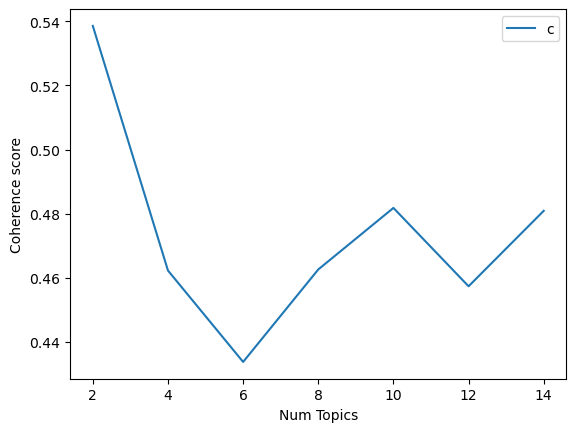

In [87]:
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [88]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.5385
Num Topics = 4  has Coherence Value of 0.4623
Num Topics = 6  has Coherence Value of 0.4338
Num Topics = 8  has Coherence Value of 0.4626
Num Topics = 10  has Coherence Value of 0.4818
Num Topics = 12  has Coherence Value of 0.4574
Num Topics = 14  has Coherence Value of 0.4809


In [89]:
# Select the model and print the topics
optimal_model = model_list[1]

In [90]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, dataset, id2word)
vis

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [91]:
def format_topics_documents(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_documents(ldamodel=optimal_model, corpus=dataset, texts=noticias)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(30)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9741,"accidente, lugar, vehículo, ruta, sector, hora...",Un total de cuatro personas resultaron lesiona...
1,1,1.0,0.9428,"accidente, lugar, vehículo, ruta, sector, hora...",Están a la espera de ser citados a declarar a ...
2,2,1.0,0.8855,"accidente, lugar, vehículo, ruta, sector, hora...",Un fatal accidente automovilístico movilizó a ...
3,3,1.0,0.6690,"accidente, lugar, vehículo, ruta, sector, hora...",La Fiscalía Local de Río Bueno formalizó hoy u...
4,4,1.0,0.9479,"accidente, lugar, vehículo, ruta, sector, hora...",Un camión repartidor de Evercrisp volcó esta m...
5,5,1.0,0.9911,"accidente, lugar, vehículo, ruta, sector, hora...","Un hombre de 34 años, identificado como Jorge ..."
6,6,1.0,0.7369,"accidente, lugar, vehículo, ruta, sector, hora...",Cuatro lesionados con diferentes grados de con...
7,7,1.0,0.9942,"accidente, lugar, vehículo, ruta, sector, hora...",Un accidente de tránsito ocurrido en Valdivia ...
8,8,1.0,0.8255,"accidente, lugar, vehículo, ruta, sector, hora...",Una persona de sexo masculino que transitaba e...
9,9,0.0,0.4699,"seguridad, accidentes, animales, tipo, persona...",16.971 controles preventivos a conductores en ...


In [92]:
media_outlet = corpus.filter(['media_outlet'], axis=1)
df_dominant_topic=df_dominant_topic.join(media_outlet)
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,0,1.0,0.9741,"accidente, lugar, vehículo, ruta, sector, hora...",Un total de cuatro personas resultaron lesiona...,diariolaguino
1,1,1.0,0.9428,"accidente, lugar, vehículo, ruta, sector, hora...",Están a la espera de ser citados a declarar a ...,lavozdepaillaco
2,2,1.0,0.8855,"accidente, lugar, vehículo, ruta, sector, hora...",Un fatal accidente automovilístico movilizó a ...,diariolaguino
3,3,1.0,0.6690,"accidente, lugar, vehículo, ruta, sector, hora...",La Fiscalía Local de Río Bueno formalizó hoy u...,diariolaguino
4,4,1.0,0.9479,"accidente, lugar, vehículo, ruta, sector, hora...",Un camión repartidor de Evercrisp volcó esta m...,diariolaguino
...,...,...,...,...,...,...
2694,2694,1.0,0.8602,"accidente, lugar, vehículo, ruta, sector, hora...",Dos voluntarios lesionados dejó como consecuen...,noticiaslosrios
2695,2695,1.0,0.6212,"accidente, lugar, vehículo, ruta, sector, hora...",Carabineros comunicó que en Semana Santa no hu...,rioenlinea
2696,2696,3.0,0.7763,"familia, años, vida, casa, comunidad, madre, d...",Los vecinos de Chauquén han expresado su preoc...,noticiaslosrios
2697,2697,2.0,0.7720,"años, actividad, país, diciembre, personas, se...","El fundo Mosqueta, de agrícola Dos Kiwis, es e...",diariolaguino


In [93]:
from pandasql import sqldf 
result = sqldf("SELECT Dominant_Topic, count(*) as nb_noticias FROM df_dominant_topic GROUP BY Dominant_Topic ORDER BY count(*) DESC")
result

,Dominant_Topic,nb_noticias
0,1.0,2179
1,3.0,247
2,0.0,167
3,2.0,106


In [94]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=1.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,752,1.0,0.9979,"accidente, lugar, vehículo, ruta, sector, horas, tránsito, conductor, personas, comuna","Una mujer de 26 años falleció tras el volcamiento del vehículo en el que se transportaba por la ruta T-20 que conecta Mariquina con Mehuín. Fiscalía confirmó que el conductor del auto estaba bajo los efectos del alcohol. En tanto, otro accidente de tránsito se registró en Valdivia. El conductor del auto se encontraba en estado de ebriedad. A eso de las 06:55 horas, según información confirmada por Carabineros en Los Ríos, en el kilómetro 3,3 de la Ruta T-20 que une San José de la Mariquina con Mehuín, volcó automóvil modelo Chevrolet Spark, patente CRXW 67, con cuatro ocupantes en su interior. Producto del accidente, horas más tarde falleció una mujer de 26 años, cuyo deceso se registró en Hospital Base de Valdivia. En tanto, los demás participantes en el volcamiento tendrían lesiones graves, pero fuera de riesgo vital, según detallaron desde Carabineros. El Fiscal de turno, Sergio Carmona, dio a conocer más tarde que el accidente se habría producido en circunstancias que el pavime...",rioenlinea


In [95]:
pd.options.display.max_colwidth = 1000

result = sqldf("SELECT * FROM df_dominant_topic WHERE dominant_topic=2.0 ORDER BY Topic_Perc_Contrib DESC LIMIT 1")
result

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,media_outlet
0,783,2.0,0.9247,"años, actividad, país, diciembre, personas, semana, habitantes, región, ferrocarril, año","Se estima que cerca de dos millones de mujeres en Chile viven en zonas rurales. Por eso y al cierre del Mes Internacional de las Mujeres Rurales que se conmemoró el octubre, la Secretaria Regional Ministerial de Agricultura Moira Henzi planteó los desafíos que enfrenta este sector de la población, en especial en tiempos de cambios sociales. Las mujeres rurales tienen un rol fundamental en el desarrollo del país y sus regiones. Según un reporte de Naciones Unidas (ONU), su participación en los distintos ámbitos de la vida contribuye de forma significativa a dinamizar las economías locales, erradicar la pobreza, fomentar la educación, salvaguardar la cultura, enfrentar el cambio climático, cuidar la salud, asegurar la alimentación y fortalecer el tejido social. “En muchas de las comunas y pueblos de la región de Los Ríos, las grandes referentes del mundo rural son precisamente mujeres. Y decir hoy mujer rural es reconocer la gran diversidad de ellas que habitan esta región: campesin...",diariodevaldivia


# Analisis de sentimiento con modelo transformer

In [4]:
#Transformers
model_name = "finiteautomata/beto-sentiment-analysis"
from transformers import AutoTokenizer, AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

from tqdm import tqdm # Barra de progreso

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [5]:
FILE = "./noticias_losrios_2022_porcomuna.csv"

dataset = pd.read_csv(FILE)
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,Futrono,Río_Bueno,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente,0,0,0,0,0,0,1,0,0,0,0,1
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente,0,0,0,0,0,0,1,0,0,0,0,0
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente,0,0,0,0,0,0,0,0,0,0,0,1
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente,0,0,0,1,0,0,0,0,0,0,0,0
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente,0,0,1,0,0,0,0,0,0,0,0,0


# Clasificar sentimientos de noticias

In [6]:
for index, row in tqdm(dataset.iterrows(), desc='Análisis de sentimiento', total=dataset.shape[0]):
    
    sentiment_value = sentiment_pipeline(row['title'])
    
    # Insertamos en dataframe
    dataset.at[index, "prediction"] = sentiment_value[0].get('label')
    dataset.at[index, "score"] = sentiment_value[0].get('score')

Análisis de sentimiento: 100%|██████████████| 2699/2699 [03:05<00:00, 14.52it/s]


In [7]:
dataset.to_csv("noticias_losrios_2022_porcomuna_sentimientos.csv")
dataset

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,...,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,prediction,score
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente,0,0,...,0,0,1,0,0,0,0,1,NEG,0.882629
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente,0,0,...,0,0,1,0,0,0,0,0,NEU,0.975912
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente,0,0,...,0,0,0,0,0,0,0,1,NEG,0.926684
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.709679
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.995531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,49438118.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/04/dos-...,Dos voluntarios lesionados dejó volcamiento de...,Dos voluntarios lesionados dejó como consecuen...,2023-04-04,accidente,0,0,...,0,0,0,0,0,0,0,1,NEG,0.976538
2695,49447046.0,chile,rioenlinea,https://www.rioenlinea.cl/semana-santa-en-los-...,Semana Santa en Los Ríos culminó con más de ve...,Carabineros comunicó que en Semana Santa no hu...,2023-04-10,accidente,0,0,...,0,0,0,0,0,0,0,0,NEG,0.755758
2696,50286695.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/19/veci...,Vecinos de Chauquén y Municipalidad de Panguip...,Los vecinos de Chauquén han expresado su preoc...,2023-04-19,accidente,0,0,...,0,1,0,0,0,0,0,0,NEU,0.910989
2697,49431190.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Hustler será protagonista de las demostracione...,"El fundo Mosqueta, de agrícola Dos Kiwis, es e...",2023-04-14,accidente,0,1,...,0,0,0,0,0,0,0,0,NEU,0.988455


# Filtrar por palabras claves

In [8]:
FILE = "./noticias_losrios_2022_porcomuna_sentimientos.csv"
DATASET = pd.read_csv(FILE)
DATASET.drop('Unnamed: 0', axis=1, inplace=True)
# Definir la lista de palabras clave sobre una temática. Por ejemplo: turismo

KEYWORDS = [
      "accidente",
      "choque",
      "colisión",
      "colisionar",
      "conductor",
      "automóvil",
      "coche",
      "vehículo",
      "heridos",
      "lesionados",
      "fatal",
      "atropello",
      "volcadura",
      "accidente de tráfico",
      "accidente de carretera",
      "accidente de auto",
      "choque frontal",
      "accidente vial",
      "accidente fatal",
      "emergencia vial",
      "accidente grave",
      "accidente leve",
      "choque lateral",
      "accidente en autopista",
      "accidente en carretera",
      "accidente en la ciudad",
      "accidente en la vía pública",
      "accidente de tránsito",
      "accidente automovilístico",
      "accidente automotor",
      "colisión múltiple",
      "accidente de transporte",
      "accidente de vehículo",
      "accidente de tránsito",
      "circulación vial",
      "seguridad vial",
      "congestión de tráfico",
      "atascos",
      "accidente por exceso de velocidad",
      "accidente por distracción",
      "accidente por condiciones climáticas",
      "accidente por imprudencia",
      "accidente por estado de ebriedad",
    ];


In [9]:
# Eliminar filas con valores NA o NaN en la columna 'text'
DATASET = DATASET.dropna(subset=['text'])


In [10]:
# Define una función para buscar palabras claves en un texto y devolver una lista de palabras clave encontradas
def find_keywords(text):
    words_found = []
    for word in KEYWORDS:
        if word in text.lower():
            words_found.append(word)
    return words_found

In [11]:
# Agrega una nueva columna 'keywords_found'
DATASET['keywords_found'] = DATASET['text'].apply(find_keywords)

# Filtra el DataFrame para guardar solo las filas que contienen más de 1 una de las palabras claves
dataset_filtrado = DATASET[DATASET['keywords_found'].map(len) > 1]


dataset_filtrado = dataset_filtrado.sort_values(by='keywords_found', key=lambda x: x.str.len(), ascending=False)

In [12]:
dataset_filtrado

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,...,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,prediction,score,keywords_found
7,49542851.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/accidente-de-tr...,Accidente de tránsito en ruta T 206 entre Pail...,Un accidente de tránsito ocurrido en Valdivia ...,2018-01-29,accidente,0,0,...,0,1,0,0,0,0,1,NEG,0.960382,"[accidente, colisión, colisionar, conductor, v..."
242,47426194.0,chile,rioenlinea,https://www.rioenlinea.cl/un-fallecido-y-cinco...,Un fallecido y cinco lesionados dejó un accide...,Una persona fallecida y cinco lesionados dejó ...,2019-07-28,accidente,0,0,...,0,0,0,0,0,1,0,NEG,0.996071,"[accidente, colisión, colisionar, conductor, a..."
1832,47684814.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,En riesgo vital se encuentra la madre de la la...,En momentos en que aún se trabaja en el sitio ...,2022-05-18,accidente,0,0,...,0,0,0,0,0,0,1,NEG,0.962232,"[accidente, colisión, colisionar, conductor, a..."
106,47712294.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Anuncian querella tras accidente que dejó 3 fa...,"El intendente de la Región de Los Ríos, César ...",2019-01-19,accidente,0,0,...,0,0,0,0,1,1,1,NEU,0.876090,"[accidente, colisión, conductor, vehículo, her..."
2275,47747202.0,chile,rioenlinea,https://www.rioenlinea.cl/adulto-mayor-murio-t...,Adulto mayor murió tras colisión frontal entre...,Un adulto mayor murió luego de una colisión fr...,2022-10-01,accidente,0,0,...,0,0,0,0,1,0,1,NEG,0.670949,"[accidente, colisión, colisionar, conductor, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,47737724.0,chile,diariopaillaco,https://www.diariopaillaco.cl/noticia/emergenc...,Colisión deja al menos un lesionado en Paillac...,ACTUALIZACIÓN 17:00 horas.- Colisión entre cam...,2021-06-24,accidente,0,0,...,0,1,0,0,0,0,0,NEU,0.925063,"[accidente, colisión]"
2158,47731357.0,chile,diariofutrono,https://www.diariofutrono.cl/noticia/actualida...,"Vialidad asumió compromisos en Futrono, pero c...","Hasta la publicación de esta nota, la direcció...",2022-08-12,accidente,0,0,...,0,0,0,0,0,0,0,NEU,0.929494,"[accidente, fatal]"
2157,47681640.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,"Vialidad asumió compromisos en Futrono, pero c...","Hasta la publicación de esta nota, la direcció...",2022-08-12,accidente,0,0,...,0,0,0,0,0,0,0,NEU,0.927059,"[accidente, fatal]"
1132,47734467.0,chile,diarioriobueno,https://www.diarioriobueno.cl/noticia/actualid...,Volcamiento en sector rural de Río Bueno deja ...,Un accidente vehicular ocurrió en la tarde del...,2021-06-17,accidente,0,0,...,0,0,0,0,0,0,0,NEG,0.951216,"[accidente, vehículo]"


In [13]:
dataset_filtrado.to_csv("noticias_losrios_2022_porcomuna_sentimientos_accidentes.csv")

# Describir dataset

In [14]:
FILE = "./noticias_losrios_2022_porcomuna_sentimientos.csv"
DATASET = pd.read_csv(FILE)
DATASET.drop('Unnamed: 0', axis=1, inplace=True)
DATASET = DATASET.dropna(subset=['text'])

DATASET

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,...,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,prediction,score
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente,0,0,...,0,0,1,0,0,0,0,1,NEG,0.882629
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente,0,0,...,0,0,1,0,0,0,0,0,NEU,0.975912
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente,0,0,...,0,0,0,0,0,0,0,1,NEG,0.926684
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.709679
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.995531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,49438118.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/04/dos-...,Dos voluntarios lesionados dejó volcamiento de...,Dos voluntarios lesionados dejó como consecuen...,2023-04-04,accidente,0,0,...,0,0,0,0,0,0,0,1,NEG,0.976538
2695,49447046.0,chile,rioenlinea,https://www.rioenlinea.cl/semana-santa-en-los-...,Semana Santa en Los Ríos culminó con más de ve...,Carabineros comunicó que en Semana Santa no hu...,2023-04-10,accidente,0,0,...,0,0,0,0,0,0,0,0,NEG,0.755758
2696,50286695.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/19/veci...,Vecinos de Chauquén y Municipalidad de Panguip...,Los vecinos de Chauquén han expresado su preoc...,2023-04-19,accidente,0,0,...,0,1,0,0,0,0,0,0,NEU,0.910989
2697,49431190.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Hustler será protagonista de las demostracione...,"El fundo Mosqueta, de agrícola Dos Kiwis, es e...",2023-04-14,accidente,0,1,...,0,0,0,0,0,0,0,0,NEU,0.988455


In [15]:
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT sum("La_Unión") as "La Unión",
sum("Los_Lagos")as "Los Lagos",
sum(Máfil)as Máfil,
sum(Paillaco) as Paillaco,
sum(Lanco) as Lanco,
sum(Panguipulli) as Panguipulli,
sum("Río_Bueno") as "Río Bueno",
sum(Mariquina) as Mariquina,
sum(Corral) as Corral,
sum(Valdivia) as Valdivia,
sum("Lago_Ranco") as "Lago Ranco",
sum(Futrono) as Futrono 
FROM DATASET
"""

print("Cantidad de noticias total en 2022 por comuna")
query1=pysqldf(query)
query1

Cantidad de noticias total en 2022 por comuna


,La Unión,Los Lagos,Máfil,Paillaco,Lanco,Panguipulli,Río Bueno,Mariquina,Corral,Valdivia,Lago Ranco,Futrono
0,313,262,65,691,88,156,337,186,58,1307,169,405


In [16]:
# Consulta SQL para contar las filas con solo valores 0
query = '''
        SELECT COUNT(*) as count_zeros
        FROM DATASET
        WHERE La_Unión = 0 AND Los_Lagos = 0 AND Máfil = 0 AND Paillaco = 0 AND Lanco = 0 AND Panguipulli = 0 AND Río_Bueno = 0 AND Mariquina = 0 AND Corral = 0 AND Valdivia = 0 AND Lago_Ranco = 0 AND Futrono = 0
        '''


# Ejecuta la consulta utilizando pandasql
result = pysqldf(query)

# Imprime el resultado
print(result['count_zeros'].values[0])


121


In [17]:
# Consulta SQL para seleccionar las filas con suma igual a 0
query = '''
        SELECT *
        FROM DATASET
        WHERE La_Unión + Los_Lagos + Máfil + Paillaco + Lanco + Panguipulli + Río_Bueno + Mariquina + Corral + Valdivia + Lago_Ranco + Futrono = 0
        '''

# Ejecuta la consulta utilizando pandasql
result = pysqldf(query)

# Imprime el resultado
result

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,...,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,prediction,score
0,47715741.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Más de 16 mil controles preventivos a conducto...,16.971 controles preventivos a conductores en ...,2018-01-05,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.988353
1,47576750.0,chile,suractual,https://www.suractual.cl/2018/01/11/autoridade...,Autoridades llaman a extremar medidas de segur...,Debido al accidente producido el pasado 10 de ...,2018-01-11,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.883624
2,49540051.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/accidente-en-ru...,Accidente en ruta 5 sur altura Km. 868 deja u...,(En Desarrollo…) Esta mañana alrededor de las ...,2018-03-29,accidente,0,0,...,0,0,0,0,0,0,0,0,NEG,0.972027
3,49539110.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/colision-vehicu...,Colisión vehicular deja dos personas lesionada...,(EN DESARROLLO… ) Esta tarde alrededor de las ...,2018-04-24,accidente,0,0,...,0,0,0,0,0,0,0,0,NEG,0.599276
4,47538244.0,chile,suractual,https://www.suractual.cl/2018/04/08/con-contro...,Con control preventivo en Carretera Ruta 5 Nor...,El operativo tuvo particular énfasis en transp...,2018-04-08,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.993523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,49439774.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Diputado Ilabaca sufrió crisis de angustia lue...,"Durante la tarde de este lunes 20 de marzo, el...",2023-03-21,accidente,0,0,...,0,0,0,0,0,0,0,0,NEG,0.991996
117,49442328.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Periodista Alipio Vera se encuentra en la UCI ...,"El destacado periodista Alipio Vera, nacido el...",2023-03-07,accidente,0,0,...,0,0,0,0,0,0,0,0,NEG,0.906224
118,49440519.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Falleció el destacado periodista puertomontino...,El hijo ilustre de Puerto Montt y destacado pe...,2023-03-20,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.724782
119,49443923.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Vehículo de Bomberos sufre accidente en ruta C...,El volcamiento de un carro aljibe de Bomberos ...,2023-04-03,accidente,0,0,...,0,0,0,0,0,0,0,0,NEG,0.968438


* Tamaño promedio de las noticias (en numero de caracteres)


In [18]:
# Consulta SQL para obtener el tamaño promedio de los textos
query = '''
        SELECT AVG(LENGTH(text)) as average_length
        FROM DATASET
        '''

# Ejecuta la consulta utilizando pandasql
result = pysqldf(query)

# Imprime el resultado
print(result['average_length'].values[0])

1087.4342349018154


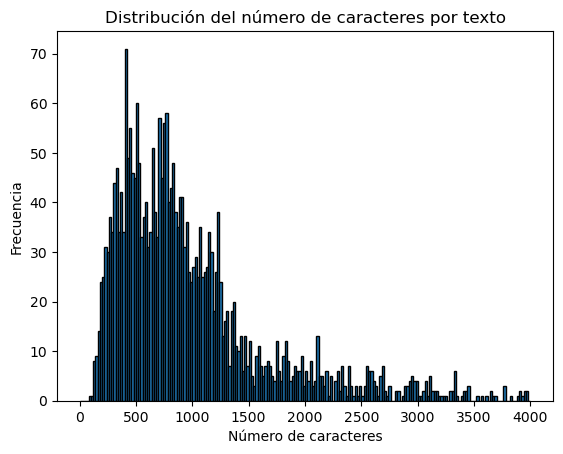

In [19]:
import matplotlib.pyplot as plt

# Calcula la longitud de cada texto
DATASET['num_caracteres'] = DATASET['text'].str.len()

# Crea un histograma para mostrar la distribución del número de caracteres
plt.hist(DATASET['num_caracteres'], bins=200, range=(0, 4000), edgecolor='black')

# Configura las etiquetas y el título del gráfico
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de caracteres por texto')

# Muestra el gráfico
plt.show()


# Visualizar mapas de Chile

In [3]:
import geopandas as gpd
FILE = "./noticias_losrios_2022_porcomuna_sentimientos.csv"
DATASET = pd.read_csv(FILE)
DATASET.drop('Unnamed: 0', axis=1, inplace=True)
DATASET = DATASET.dropna(subset=['text'])

DATASET

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,...,La_Unión,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,prediction,score
0,47715031.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Cuatro personas resultaron lesionadas en colis...,Un total de cuatro personas resultaron lesiona...,2018-01-25,accidente,0,0,...,0,0,1,0,0,0,0,1,NEG,0.882629
1,49543307.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/en-libertad-que...,En libertad quedaron conductores de camiones q...,Están a la espera de ser citados a declarar a ...,2018-01-11,accidente,0,0,...,0,0,1,0,0,0,0,0,NEU,0.975912
2,47715021.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Carabinero valdiviano con residencia en Quelló...,Un fatal accidente automovilístico movilizó a ...,2018-01-26,accidente,0,0,...,0,0,0,0,0,0,0,1,NEG,0.926684
3,47714876.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Conductor de trágico accidente en Río Bueno qu...,La Fiscalía Local de Río Bueno formalizó hoy u...,2018-01-16,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.709679
4,47715025.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Camión repartidor volcó camino a Futrono - Dia...,Un camión repartidor de Evercrisp volcó esta m...,2018-01-25,accidente,0,0,...,0,0,0,0,0,0,0,0,NEU,0.995531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2694,49438118.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/04/dos-...,Dos voluntarios lesionados dejó volcamiento de...,Dos voluntarios lesionados dejó como consecuen...,2023-04-04,accidente,0,0,...,0,0,0,0,0,0,0,1,NEG,0.976538
2695,49447046.0,chile,rioenlinea,https://www.rioenlinea.cl/semana-santa-en-los-...,Semana Santa en Los Ríos culminó con más de ve...,Carabineros comunicó que en Semana Santa no hu...,2023-04-10,accidente,0,0,...,0,0,0,0,0,0,0,0,NEG,0.755758
2696,50286695.0,chile,noticiaslosrios,https://www.noticiaslosrios.cl/2023/04/19/veci...,Vecinos de Chauquén y Municipalidad de Panguip...,Los vecinos de Chauquén han expresado su preoc...,2023-04-19,accidente,0,0,...,0,1,0,0,0,0,0,0,NEU,0.910989
2697,49431190.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Hustler será protagonista de las demostracione...,"El fundo Mosqueta, de agrícola Dos Kiwis, es e...",2023-04-14,accidente,0,1,...,0,0,0,0,0,0,0,0,NEU,0.988455


In [4]:
SHAPEFILE=r'./shape/comunas.shp' #shapefile de las regiones y comunas de Chile
REGION = 14 #Los Rios

In [5]:
territory = gpd.read_file(SHAPEFILE, encoding='utf-8')
territory = territory[territory["codregion"] == REGION]
# Obtenemos los datos de las Columnas "Comuna", "geometry"
territory = territory[["Comuna", "geometry"]]

In [6]:
def save_map(df, territory, image_name: str = "Mapa_Calor"):
    
    #Junta las tablas df y Pais
    territory = territory.merge(df, on = "Comuna")
    
    #Inicializa matplotlib para la creacion del mapa
    fig, ax = plt.subplots(figsize=(10, 10))
    max_presente = df.max()[1]#valore maximo para la barra de calor
    territory.plot(column = 'Valor',ax=ax,edgecolor = "gray", cmap = 'OrRd', legend = False).set_axis_off()
    bar_info = plt.cm.ScalarMappable(cmap="Reds", norm=plt.Normalize(vmin=0,vmax=max_presente))
    bar_info._A = []
    cbar = fig.colorbar(bar_info)
    
    #Guardar imagen en nombre_imagen
    plt.savefig('.//{}.svg'.format(image_name), bbox_inches = "tight",transparent = True)

In [7]:
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT sum("La_Unión") as "La Unión",
sum("Los_Lagos")as "Los Lagos",
sum(Máfil)as Máfil,
sum(Paillaco) as Paillaco,
sum(Lanco) as Lanco,
sum(Panguipulli) as Panguipulli,
sum("Río_Bueno") as "Río Bueno",
sum(Mariquina) as Mariquina,
sum(Corral) as Corral,
sum(Valdivia) as Valdivia,
sum("Lago_Ranco") as "Lago Ranco",
sum(Futrono) as Futrono 
FROM DATASET
"""

print("Cantidad de noticias total en 2022 por comuna")
query1=pysqldf(query)
query1

Cantidad de noticias total en 2022 por comuna


,La Unión,Los Lagos,Máfil,Paillaco,Lanco,Panguipulli,Río Bueno,Mariquina,Corral,Valdivia,Lago Ranco,Futrono
0,313,262,65,691,88,156,337,186,58,1307,169,405


La Unión
Los Lagos
Máfil
Paillaco
Lanco
Panguipulli
Río Bueno
Mariquina
Corral
Valdivia
Lago Ranco
Futrono


/tmp/ipykernel_4768/2100615201.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info)


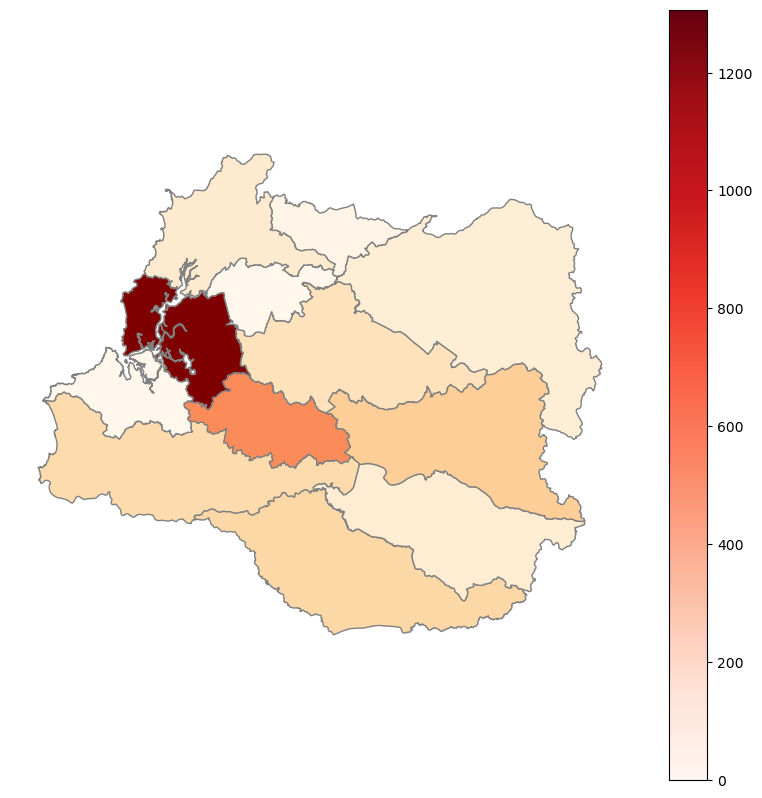

In [8]:
df=query1

lista =[]
cont = 0
for i in territory["Comuna"]:
    print(i)
    lista.append({"Comuna": i, "Valor": df.iloc[0][cont]})
    cont +=1
df = pd.DataFrame(lista)

save_map(df, territory, "mapa")
plt.savefig("mapa.png", dpi=500)

# Accidentes relacionados con automoviles

In [9]:
FILE = "./noticias_losrios_2022_porcomuna_sentimientos_accidentes.csv"
DATASET = pd.read_csv(FILE)
DATASET.drop('Unnamed: 0', axis=1, inplace=True)
DATASET

,id_news,country,media_outlet,url,title,text,date,search,Lago_Ranco,Los_Lagos,...,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,prediction,score,keywords_found
0,49542851.0,chile,lavozdepaillaco,https://www.lavozdepaillaco.cl/accidente-de-tr...,Accidente de tránsito en ruta T 206 entre Pail...,Un accidente de tránsito ocurrido en Valdivia ...,2018-01-29,accidente,0,0,...,0,1,0,0,0,0,1,NEG,0.960382,"['accidente', 'colisión', 'colisionar', 'condu..."
1,47426194.0,chile,rioenlinea,https://www.rioenlinea.cl/un-fallecido-y-cinco...,Un fallecido y cinco lesionados dejó un accide...,Una persona fallecida y cinco lesionados dejó ...,2019-07-28,accidente,0,0,...,0,0,0,0,0,1,0,NEG,0.996071,"['accidente', 'colisión', 'colisionar', 'condu..."
2,47684814.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,En riesgo vital se encuentra la madre de la la...,En momentos en que aún se trabaja en el sitio ...,2022-05-18,accidente,0,0,...,0,0,0,0,0,0,1,NEG,0.962232,"['accidente', 'colisión', 'colisionar', 'condu..."
3,47712294.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,Anuncian querella tras accidente que dejó 3 fa...,"El intendente de la Región de Los Ríos, César ...",2019-01-19,accidente,0,0,...,0,0,0,0,1,1,1,NEU,0.876090,"['accidente', 'colisión', 'conductor', 'vehícu..."
4,47747202.0,chile,rioenlinea,https://www.rioenlinea.cl/adulto-mayor-murio-t...,Adulto mayor murió tras colisión frontal entre...,Un adulto mayor murió luego de una colisión fr...,2022-10-01,accidente,0,0,...,0,0,0,0,1,0,1,NEG,0.670949,"['accidente', 'colisión', 'colisionar', 'condu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2263,47737724.0,chile,diariopaillaco,https://www.diariopaillaco.cl/noticia/emergenc...,Colisión deja al menos un lesionado en Paillac...,ACTUALIZACIÓN 17:00 horas.- Colisión entre cam...,2021-06-24,accidente,0,0,...,0,1,0,0,0,0,0,NEU,0.925063,"['accidente', 'colisión']"
2264,47731357.0,chile,diariofutrono,https://www.diariofutrono.cl/noticia/actualida...,"Vialidad asumió compromisos en Futrono, pero c...","Hasta la publicación de esta nota, la direcció...",2022-08-12,accidente,0,0,...,0,0,0,0,0,0,0,NEU,0.929494,"['accidente', 'fatal']"
2265,47681640.0,chile,diariolaguino,https://www.diariolaguino.cl/noticia/actualida...,"Vialidad asumió compromisos en Futrono, pero c...","Hasta la publicación de esta nota, la direcció...",2022-08-12,accidente,0,0,...,0,0,0,0,0,0,0,NEU,0.927059,"['accidente', 'fatal']"
2266,47734467.0,chile,diarioriobueno,https://www.diarioriobueno.cl/noticia/actualid...,Volcamiento en sector rural de Río Bueno deja ...,Un accidente vehicular ocurrió en la tarde del...,2021-06-17,accidente,0,0,...,0,0,0,0,0,0,0,NEG,0.951216,"['accidente', 'vehículo']"


Aquí tenemos la base de datos de las noticias filtradas para que tengamos acceso a las relacionadas con accidentes automovilísticos.
Pasamos de tener 2699 noticias a 2268 despues del filtro.

In [10]:
pysqldf = lambda q: sqldf(q, globals())

query = """
SELECT sum("La_Unión") as "La Unión",
sum("Los_Lagos")as "Los Lagos",
sum(Máfil)as Máfil,
sum(Paillaco) as Paillaco,
sum(Lanco) as Lanco,
sum(Panguipulli) as Panguipulli,
sum("Río_Bueno") as "Río Bueno",
sum(Mariquina) as Mariquina,
sum(Corral) as Corral,
sum(Valdivia) as Valdivia,
sum("Lago_Ranco") as "Lago Ranco",
sum(Futrono) as Futrono 
FROM DATASET
"""

print("Cantidad de noticias total 2018-2023 por comuna")
query1=pysqldf(query)
query1

Cantidad de noticias total 2018-2023 por comuna


,La Unión,Los Lagos,Máfil,Paillaco,Lanco,Panguipulli,Río Bueno,Mariquina,Corral,Valdivia,Lago Ranco,Futrono
0,252,210,58,618,59,112,281,158,19,1098,133,310


/tmp/ipykernel_4768/2100615201.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(bar_info)


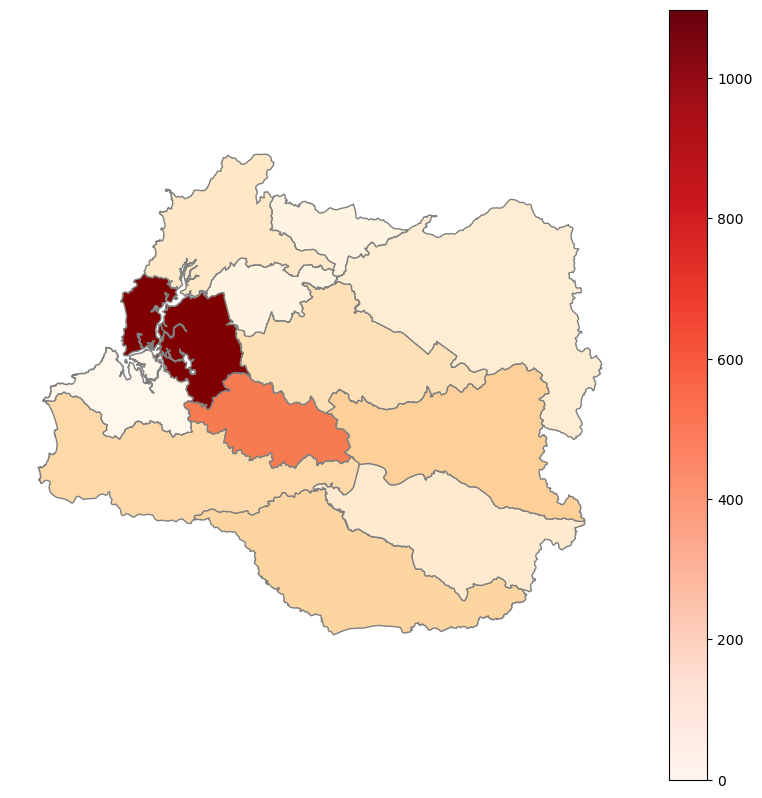

In [11]:
df=query1

lista =[]
cont = 0
for i in territory["Comuna"]:
    lista.append({"Comuna": i, "Valor": df.iloc[0][cont]})
    cont +=1
df = pd.DataFrame(lista)

save_map(df, territory, "mapa")
plt.savefig("mapa.png", dpi=500);

In [12]:
df['%']=round((df.Valor/2268)*100,1)
df

,Comuna,Valor,%
0,La Unión,252,11.1
1,Los Lagos,210,9.3
2,Máfil,58,2.6
3,Paillaco,618,27.2
4,Lanco,59,2.6
5,Panguipulli,112,4.9
6,Río Bueno,281,12.4
7,Mariquina,158,7.0
8,Corral,19,0.8
9,Valdivia,1098,48.4


In [13]:
DATASET_prueba = DATASET

In [14]:

def fitrar_date(start_date,end_date,df_eventos):
    df_eventos['date'] = pd.to_datetime(df_eventos['date'])


    filtered_df = df_eventos[(df_eventos['date'] >= start_date) & (df_eventos['date'] <= end_date)]
    
    meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre','Noviembre','Diciembre']
    
    df1 = filtered_df.groupby(pd.Grouper(key='date', axis=0,freq='M')).sum()
    
    df1['Mes'] = meses
    df1.set_index('Mes', inplace=True)
    
    # Crear el mapa de calor utilizando seaborn
    plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico si es necesario
    sns.heatmap(df1, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='gray')

    # Agregar etiquetas y título
    plt.xlabel('Fechas')
    plt.ylabel('Ciudades')
    plt.title('Mapa de calor de eventos por fecha y ciudad')

    # Mostrar el mapa de calor
    plt.show()

    return 




/tmp/ipykernel_4768/705841083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eventos['date'] = pd.to_datetime(df_eventos['date'])


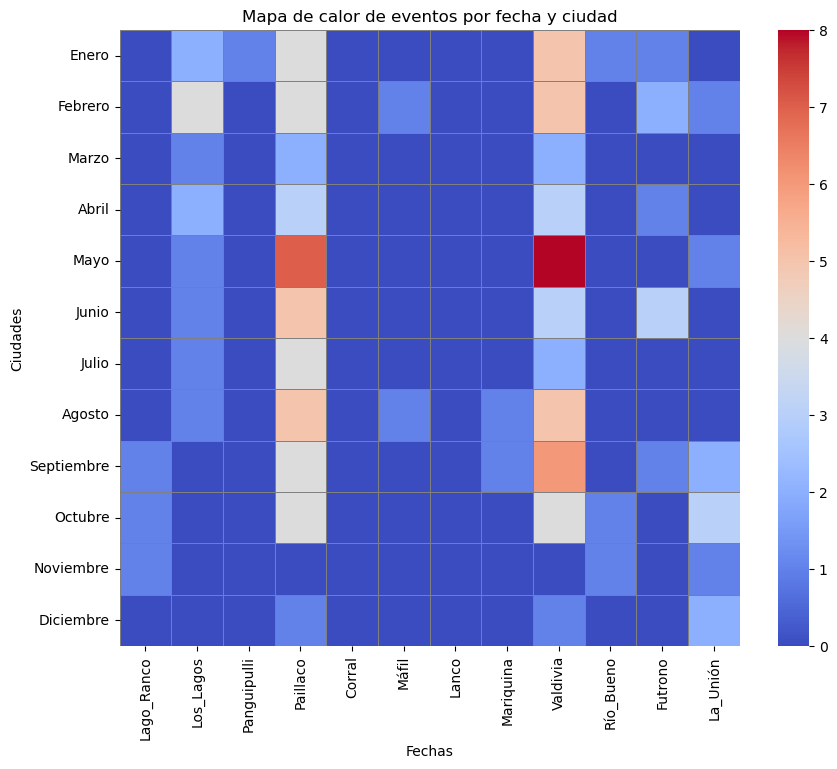

In [15]:
df_eventos = DATASET_prueba[['date', 'Lago_Ranco', 'Los_Lagos', 'Panguipulli', 'Paillaco', 'Corral', 'Máfil', 'Lanco', 'Mariquina', 'Valdivia','Río_Bueno','Futrono','La_Unión']]
# Filtrar por el rango de fechas (2018-2019)
start_date = '2018-01-01'
end_date = '2018-12-31'
fitrar_date(start_date,end_date,df_eventos)

/tmp/ipykernel_4768/705841083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eventos['date'] = pd.to_datetime(df_eventos['date'])


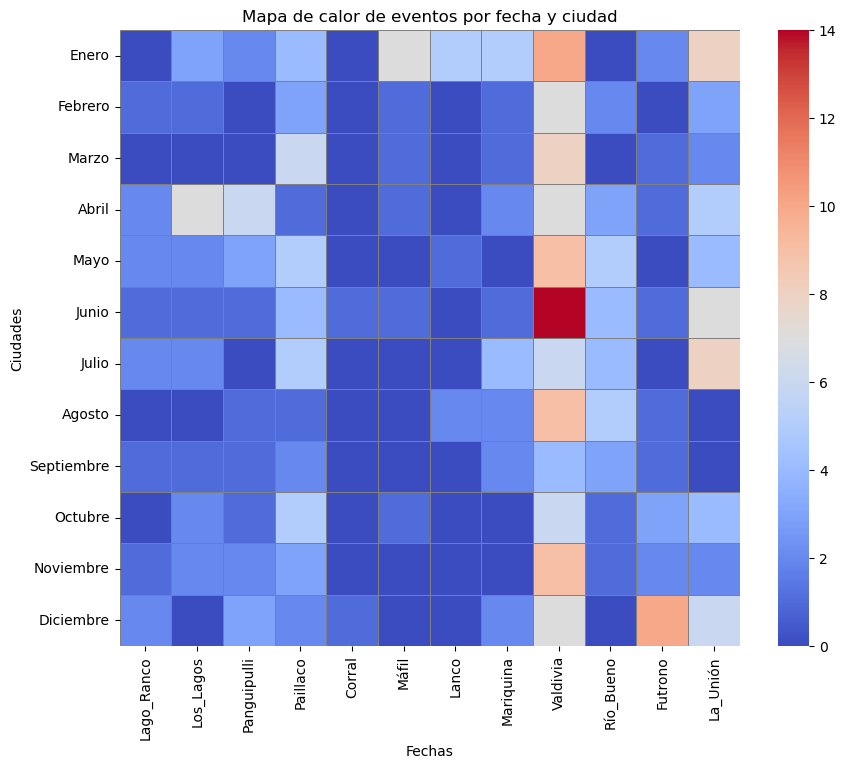

In [16]:
start_date = '2019-01-01'
end_date = '2019-12-31'
fitrar_date(start_date,end_date,df_eventos)

/tmp/ipykernel_4768/705841083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eventos['date'] = pd.to_datetime(df_eventos['date'])


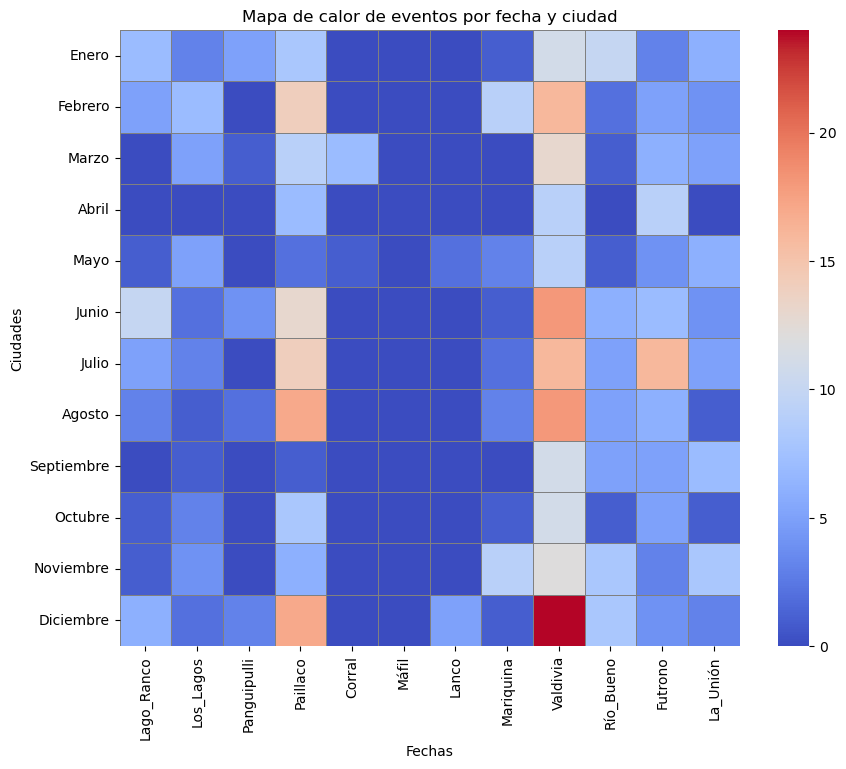

In [17]:
start_date = '2020-01-01'
end_date = '2020-12-31'
fitrar_date(start_date,end_date,df_eventos)

/tmp/ipykernel_4768/705841083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eventos['date'] = pd.to_datetime(df_eventos['date'])


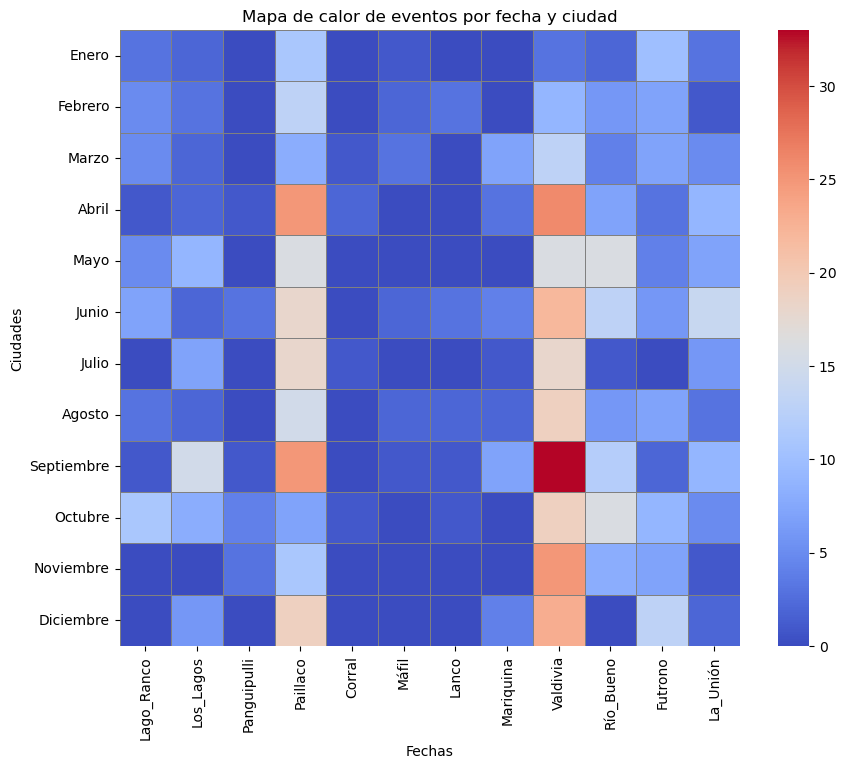

In [18]:
start_date = '2021-01-01'
end_date = '2021-12-31'
fitrar_date(start_date,end_date,df_eventos)

/tmp/ipykernel_4768/705841083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eventos['date'] = pd.to_datetime(df_eventos['date'])


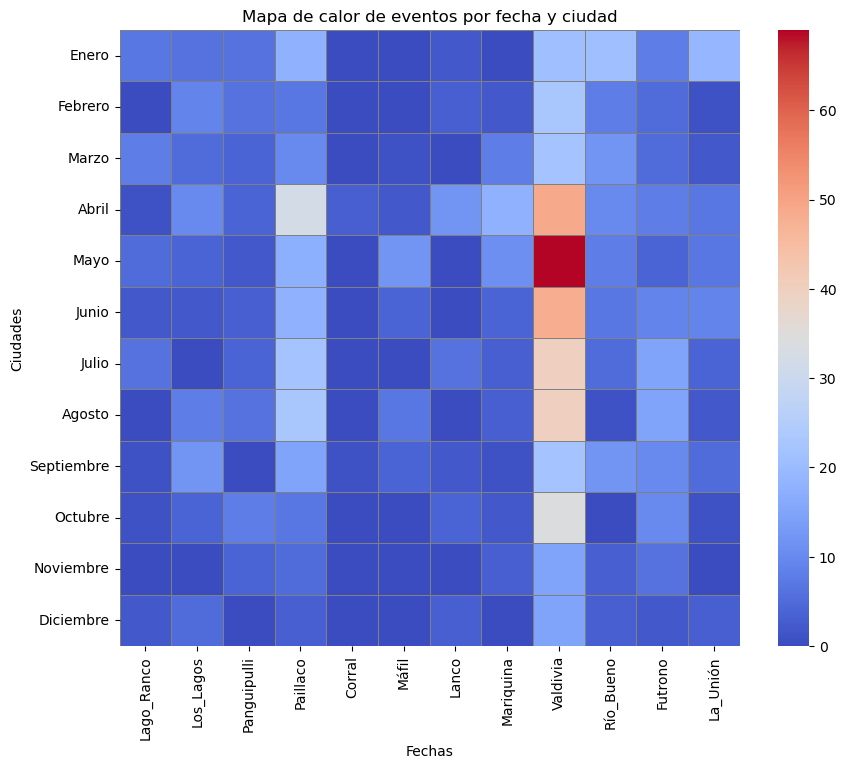

In [19]:
start_date = '2022-01-01'
end_date = '2022-12-13'
df1 = fitrar_date(start_date,end_date,df_eventos)



In [25]:
start_date = '2018-01-01'
end_date = '2023-12-13'

df_eventos['date'] = pd.to_datetime(df_eventos['date'])


filtered_df = df_eventos[(df_eventos['date'] >= start_date) & (df_eventos['date'] <= end_date)]

df1 = filtered_df.groupby(pd.Grouper(key='date', axis=0,freq='M')).sum()


/tmp/ipykernel_4768/2037306863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eventos['date'] = pd.to_datetime(df_eventos['date'])


In [26]:
df1.reset_index(inplace=True)
df1

,date,Lago_Ranco,Los_Lagos,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,Río_Bueno,Futrono,La_Unión
0,2018-01-31,0,2,1,4,0,0,0,0,5,1,1,0
1,2018-02-28,0,4,0,4,0,1,0,0,5,0,2,1
2,2018-03-31,0,1,0,2,0,0,0,0,2,0,0,0
3,2018-04-30,0,2,0,3,0,0,0,0,3,0,1,0
4,2018-05-31,0,1,0,7,0,0,0,0,8,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2022-12-31,2,9,0,12,0,0,3,1,30,3,4,7
60,2023-01-31,0,4,3,16,0,2,1,0,48,6,16,12
61,2023-02-28,2,3,7,10,0,1,1,8,35,2,13,1
62,2023-03-31,3,5,0,17,0,0,0,10,54,8,4,1


In [28]:
df1['Mes'] = df1['date'].dt.month
df1 = df1.drop('date', axis=1)
df1

,Lago_Ranco,Los_Lagos,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,Río_Bueno,Futrono,La_Unión,Mes
0,0,2,1,4,0,0,0,0,5,1,1,0,1
1,0,4,0,4,0,1,0,0,5,0,2,1,2
2,0,1,0,2,0,0,0,0,2,0,0,0,3
3,0,2,0,3,0,0,0,0,3,0,1,0,4
4,0,1,0,7,0,0,0,0,8,0,0,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2,9,0,12,0,0,3,1,30,3,4,7,12
60,0,4,3,16,0,2,1,0,48,6,16,12,1
61,2,3,7,10,0,1,1,8,35,2,13,1,2
62,3,5,0,17,0,0,0,10,54,8,4,1,3


In [31]:
df_mes = df1.groupby(df1['Mes']).sum()

In [32]:
df_mes

,Lago_Ranco,Los_Lagos,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,Río_Bueno,Futrono,La_Unión
Mes,,,,,,,,,,,,
1,17,20,17,61,0,10,8,6,98,40,40,48
2,13,27,13,51,0,5,7,20,95,20,32,11
3,16,18,5,52,8,5,0,26,112,25,23,15
4,4,22,18,71,5,3,12,27,108,21,22,21
5,13,21,5,47,1,12,3,14,111,30,12,25
6,20,8,11,58,1,7,3,10,105,30,26,34
7,13,13,4,63,1,0,6,10,82,15,31,23
8,6,12,9,61,0,10,4,11,91,17,29,6
9,4,29,2,47,1,5,3,11,76,32,19,23


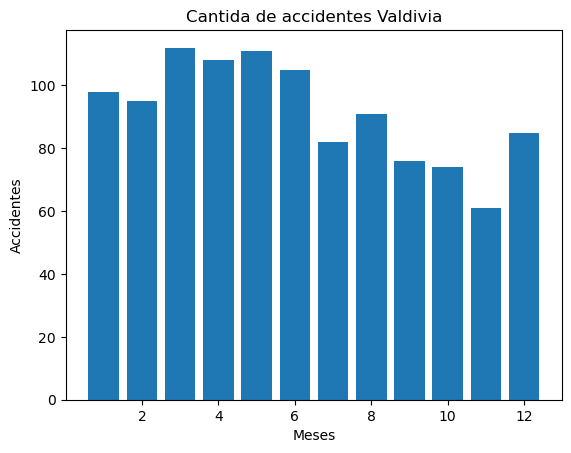

In [47]:
# Crear el gráfico de barras
plt.bar(df_mes.index, df_mes['Valdivia'])

# Agregar etiquetas y título
plt.xlabel('Meses')
plt.ylabel('Accidentes')
plt.title('Cantida de accidentes Valdivia')

# Mostrar el gráfico
plt.show()

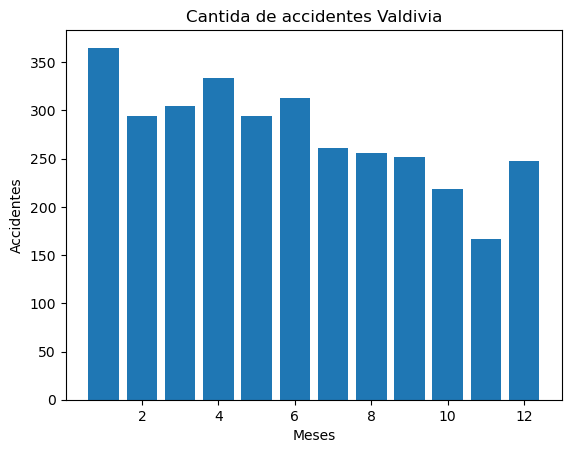

In [51]:
# Crear el gráfico de barras
plt.bar(df_mes.index,df_mes.sum(axis=1))

# Agregar etiquetas y título
plt.xlabel('Meses')
plt.ylabel('Accidentes')
plt.title('Cantida de accidentes Region')

# Mostrar el gráfico
plt.show()

,Lago_Ranco,Los_Lagos,Panguipulli,Paillaco,Corral,Máfil,Lanco,Mariquina,Valdivia,Río_Bueno,Futrono,La_Unión
Mes,,,,,,,,,,,,
1,17,20,17,61,0,10,8,6,98,40,40,48
2,13,27,13,51,0,5,7,20,95,20,32,11
3,16,18,5,52,8,5,0,26,112,25,23,15
4,4,22,18,71,5,3,12,27,108,21,22,21
5,13,21,5,47,1,12,3,14,111,30,12,25
6,20,8,11,58,1,7,3,10,105,30,26,34
7,13,13,4,63,1,0,6,10,82,15,31,23
8,6,12,9,61,0,10,4,11,91,17,29,6
9,4,29,2,47,1,5,3,11,76,32,19,23


Text(0.5, 1.0, 'Mapa de calor de eventos por fecha y ciudad')

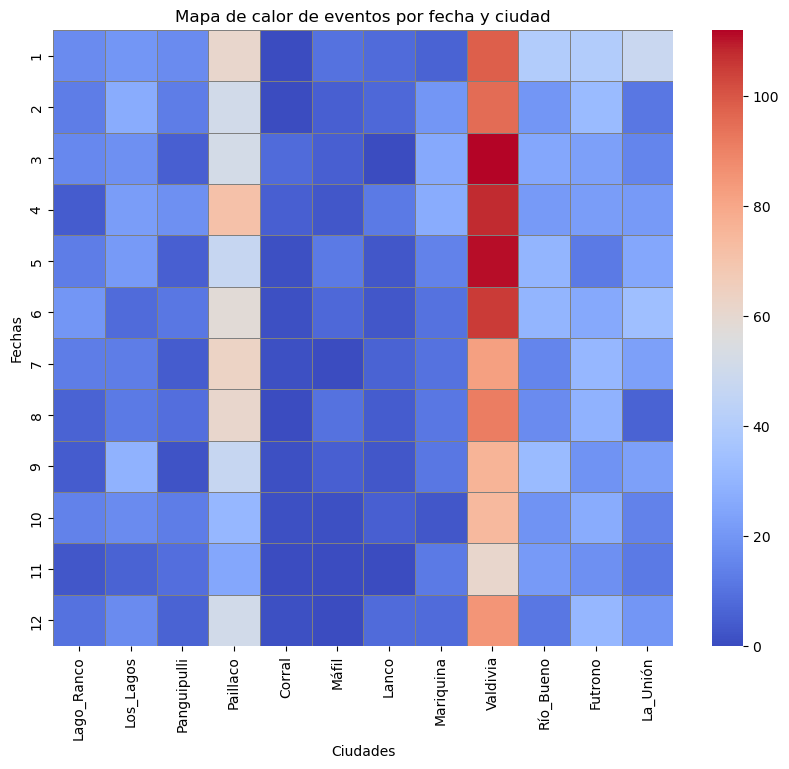

In [54]:
# Crear el mapa de calor utilizando seaborn
plt.figure(figsize=(10, 8))  # Ajustar el tamaño del gráfico si es necesario
sns.heatmap(df_mes, cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='gray')

# Agregar etiquetas y título
plt.xlabel('Ciudades')
plt.ylabel('Fechas')
plt.title('Mapa de calor de eventos por fecha y ciudad')